## Personal Transaction Auditing and Budget Following Program

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install pandas
import pandas as pd
!pip install numpy

### Import transaction histroy from your bank in csv format:

In [2]:
file_path = r"C:\Users\tsche\OneDrive\Desktop\My Life Control Centre\IT Projects\Personal Expense and budget tracking program\March 2024.csv"
column_names = ['Amount', 'Description', 'Total']  
df = pd.read_csv(file_path, header=None, names=column_names)
# Rename the existing index column to 'Date'
df = df.rename_axis('Date:')
# Remove the 'Balance' column
df = df.drop(columns=['Total'])

#Inspect sample:
print(df.head())
df.shape

            Amount                                       Description
Date:                                                               
31/03/2024   50.00          Transfer from xx2674 CommBank app Dinner
31/03/2024  -51.98                  WOOLWORTHS 1358 CHARNWOOD ACT AU
31/03/2024   50.00         Transfer from xx2674 CommBank app Flowers
30/03/2024  -21.00                  BWS LIQUOR 6435 CHARNWOOD ACT AU
30/03/2024   45.00  Fast Transfer From daniel CREDIT TO ACCOUNT Wine


(114, 2)

In [3]:
# Filter out rows containing 'CREDIT TO ACCOUNT'
filtered_df = df[~df['Description'].str.contains('CREDIT TO ACCOUNT', case=False, na=False)]

# Create a DataFrame containing only the removed rows
removed_rows_df = df[df['Description'].str.contains('CREDIT TO ACCOUNT', case=False, na=False)]

# Now, 'filtered_df' contains the rows without 'CREDIT TO ACCOUNT',
# and 'removed_rows_df' contains the rows with 'CREDIT TO ACCOUNT'.

print(removed_rows_df.head)
removed_rows_df.shape



<bound method NDFrame.head of             Amount                                        Description
Date:                                                                
30/03/2024    45.0   Fast Transfer From daniel CREDIT TO ACCOUNT Wine
30/03/2024   450.0  Fast Transfer From daniel CREDIT TO ACCOUNT Se...
24/03/2024   500.0        Fast Transfer From daniel CREDIT TO ACCOUNT
22/03/2024   100.0        Fast Transfer From daniel CREDIT TO ACCOUNT
19/03/2024   230.0  Fast Transfer From daniel CREDIT TO ACCOUNT Wa...>


(5, 2)

### Create Different Categories for Personal Budget:

#### Input identifying keywords found in description used to categories transactions from csv file:

In [4]:
# Initialize a dictionary to store category totals for both Categories and incomes
Category = {'Subscriptions & Entertainment': 0, 'Groceries': 0, 'Petrol': 0, 'Utilities': 0,
                  'Medication': 0, 'Holiday Spending': 0, 'Takeaway & Coffee': 0,
                  'Rent': 0, 'Gardening and Tools': 0, 'Car Maintenance': 0,
                  'Travel Categories': 0, 'Social Activities': 0, 'Doctors and Dentist': 0, 'Party and Gifts': 0, 'Pet care': 0,
                  'Education': 0, 'Insurance': 0, 'Furniture and Appliances': 0, 'Hobbies': 0, 'Kids Holiday and Afters program': 0,
                  'Hair Care': 0, 'Accounting & ASIC': 0, 'Clothes and Shoes': 0, 'Trading': 0, 'Kids School': 0,'Salary': 0, 'Centerlink': 0,
                  'Gift': 0, 'House Sharing': 0,'Refunds': 0, 'Loan Repayments': 0,'Internal Transfers' : 0, 'NaN Category':0}

# Function to categorize transactions based on keywords and update category totals
def categorize_and_update_totals(row):
    global Category

    description = row['Description'].strip().casefold()

    if any(keyword.strip().casefold() in description for keyword in ['Discord','Fortnite', 'Patreon','APPLE','Salt Center','CantaloupeSystemsAustr','Steam','Telstra','optus','google','splice','subscription', 'netflix', 'spotify','salt.ch', 'apple', 'Exitlag', 'disney','XD* DAVID MCBR SYDNEY','Excess Interest','DBS*DEBITSSUCESSDF', 'stan', 'prime','Adobe','OF LONDON GB GBR','International Transaction Fee','microsoft']):
        if row['Amount'] < 0:
            row['Category'] = 'Subscriptions & Entertainment'
            Category['Subscriptions & Entertainment'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Subscriptions & Entertainment'
    elif any(keyword.strip().casefold() in description for keyword in ['Barbershop','Fresha.com','HAIR SALON','Gem Barber'] ):
        if row['Amount'] < 0:
            row['Category'] = 'Hair Care'
            Category['Hair Care'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Hair Care'
    elif any(keyword.strip().casefold() in description for keyword in ['canberra city gymnastics','DBS*Charnwood Belconn Belconnen'] ):
        if row['Amount'] < 0:
            row['Category'] = 'Kids Holiday and Afters program'
            Category['Kids Holiday and Afters program'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Kids Holiday and Afters program'
    elif any(keyword.strip().casefold() in description for keyword in ['Ms Caroline Tscherry','child support','Kids','SMIGGLE PTY','MSP PHOTOGRAPHY'] ):
        if row['Amount'] < 0:
            row['Category'] = 'Kids School'
            Category['Kids School'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Kids School'
    elif any(keyword.strip().casefold() in description for keyword in ['Sunglass','SDS 3226 BELCONNEN AUS','clothes','THE ATHLETES FOOT','BEST AND LESS'] ):
        if row['Amount'] < 0:
            row['Category'] = 'Clothes and Shoes'
            Category['Clothes and Shoes'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Clothes and Shoes'
    elif any(keyword.strip().casefold() in description for keyword in ['ATO','ASIC','Viisum'] ):
        if row['Amount'] < 0:
            row['Category'] = 'Accounting & ASIC'
            Category['Accounting & ASIC'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Accounting & ASIC'
    elif any(keyword.strip().casefold() in description for keyword in ['Jeremy Hopwood','Stromlo','Enmore Theatre','Sydney Aquarium','FANTASEA CRUISING','FH* PAINT PINOT','BOUNCE HOLDINGS','PROJECT BEATS','blochaus','power kart', 'dance', 'ymca','pool','CLUB LIME BRUCE','PALACE ELECTRIC CANBERRA','hoyts','iplay'] ):
        if row['Amount'] < 0:
            row['Category'] = 'Social Activities'
            Category['Social Activities'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Social Activities'
    elif any(keyword.strip().casefold() in description for keyword in ['COURSRA']):
        if row['Amount'] < 0:
            row['Category'] = 'Education'
            Category['Education'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Education'
    elif any(keyword.strip().casefold() in description for keyword in ['LH Trading Brisbane','ABLETON','Aerial PoleBelco','Core Electronics','Jaycar Electronics','ECKERSLEYS','BIKE CULTURE']):
        if row['Amount'] < 0:
            row['Category'] = 'Hobbies'
            Category['Hobbies'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Hobbies'
    elif any(keyword.strip().casefold() in description for keyword in ['Cansecure','GOOD GUYS','Ikea','JB HI FI']):
        if row['Amount'] < 0:
            row['Category'] = 'Furniture and Appliances'
            Category['Furniture and Appliances'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Furniture and Appliances'
    elif any(keyword.strip().casefold() in description for keyword in ['PETSTOCK','Gem aquatics','PETBARN']):
        if row['Amount'] < 0:
            row['Category'] = 'Pet care'
            Category['Pet care'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Pet care'
    elif any(keyword.strip().casefold() in description for keyword in ['ALLIANZ','BUPA','Aami','Nrma','Gio']):
        if row['Amount'] < 0:
            row['Category'] = 'Insurance'
            Category['Insurance'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Insurance'
    elif any(keyword.strip().casefold() in description for keyword in ['Dylan','birthday','SMART DOLLAR',"LET'S PLAY INDOOR",'SANLONG PTY LTD MITCHELL','BIG W','ARENA STRENGTH','Target', 'Rebel','kmart','kidstuff','Amazon', 'lego']):
        if row['Amount'] < 0:
            row['Category'] = 'Party and Gifts'
            Category['Party and Gifts'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Party and Gifts'
    elif any(keyword.strip().casefold() in description for keyword in ['ANZ']):
        if row['Amount'] < 0:
            row['Category'] = 'Loan Repayments'
            Category['Loan Repayments'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Loan Repayments'
    elif any(keyword.strip().casefold() in description for keyword in ['IDNTLAB PTY','PODIATRY','SHFPACT Canberra','MORRIS PRACTICE','PAEDIATRIC','WWW.SOMEONE.HEALTH','NAGESH CHAKKA AND POOR MACQUARIE','Ochre','Oscar', 'Positive Dental']):
        if row['Amount'] < 0:
            row['Category'] = 'Doctors and Dentist'
            Category['Doctors and Dentist'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Doctors and Dentist'
    elif 'Ennanneck' in row['Description']:
        if row['Amount'] < 0:
            row['Category'] = 'Doctors and Dentist'
            Category['Doctors and Dentist'] += (row['Amount']/2)
            df.loc[row.name, 'Category'] = 'Doctors and Dentist'
    elif any(keyword.strip().casefold() in description for keyword in ['bunnings', 'BUNNINGS']):
        if row['Amount'] < 0:
            row['Category'] = 'Gardening and Tools'
            Category['Gardening and Tools'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Gardening and Tools'
    elif any(keyword.strip().casefold() in description for keyword in ['MYCAR','SUPER CHEAP AUTO','CANBERRA CARPARTS','Rego','Mycar', 'DH Automotive', 'Repco', 'supercheap', 'D and H Automotiv']):
        if row['Amount'] < 0:
            row['Category'] = 'Car Maintenance'
            Category['Car Maintenance'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Car Maintenance'
    elif any(keyword.strip().casefold() in description for keyword in ['University of Canber','PARKING FEES','ACCESS CANB','LINKTGO','TRANSPORTFORNSW','Inflight Internet','parking', 'toll','linkedtgo']):
        if row['Amount'] < 0:
            row['Category'] = 'Travel Categories'
            Category['Travel Categories'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Travel Categories'
    elif any(keyword.strip().casefold() in description for keyword in ['EG GROUP','BP','7-ELEVEN','petrol', 'gas', 'fuel', 'COLES EXPRESS']):
        if row['Amount'] < 0:
            row['Category'] = 'Petrol'
            Category['Petrol'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Petrol'
    #Groceries to go after petrol so Coles Express is first filtered and the remaining cells with only coles go to groceries
    # Check for Category Categories and update Category with negative amounts
    if any(keyword.strip().casefold() in description for keyword in ['Costco','Groceries','AP CHARNWOOD LPO CHARNWOOD','AP CANBERRA GPO PS CANBERRA AUS ','NEWSAGENCY','coles','Woolworths', 'Aldi']):
        if row['Amount'] < 0:
            row['Category'] = 'Groceries'
            Category['Groceries'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Groceries'
    elif any(keyword.strip().casefold() in description for keyword in ['Transfer To Fuse Property','Actew', 'ActewAGL Retail']):
        if row['Amount'] < 0:
            row['Category'] = 'Utilities'
            Category['Utilities'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Utilities'
    elif any(keyword.strip().casefold() in description for keyword in ['CMC']):
        if row['Amount'] < 0:
            row['Category'] = 'Trading'
            Category['Trading'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Trading'
    elif 'ten00420' in description and row['Amount'] not in [-960.00, -1000.00]:
        if row['Amount'] < 0:
            row['Category'] = 'Utilities'
            Category['Utilities'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Utilities'
    elif any(keyword.strip().casefold() in description for keyword in ['GOLD CREEK DISCOUNT DR','Iherb','medication', 'chemist', 'pharmacy']):
        if row['Amount'] < 0:
            row['Category'] = 'Medication'
            Category['Medication'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Medication'
    elif any(keyword.strip().casefold() in description for keyword in ['CRONULLA GROUP','EMIRATES','OMIO *OMIO BERLIN DE DEU','ETIHAD','QANTAS','Hyatt Place','Bahnhof Flughafen','My Leukerbad AG Leukerbad','holiday', 'vacation', 'travel', 'CampingAccom AUS']):
        if row['Amount'] < 0:
            row['Category'] = 'Holiday Spending'
            Category['Holiday Spending'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Holiday Spending'
    elif any(keyword.strip().casefold() in description for keyword in ['Southern Cr','Spit','Turkish','Cardless Cash for collection Shop','TCC Belconnen Belconnen','SQ *FORREST SPECIALTY Belconnen','SMP*Bernies From The Charnwood','Australian Way', 'Landsi Mascot','Zambrero','SUPERIORMEAT','Foodland Z?ri Kafi','Daily Grind Pymble West Pymble','L Hands Sutherland','WHS SYD AIR T1 Pier C','Soul Origin Mascot Mascot','Jamie Oliver','EPSDD Canberra ','Lagadere Fil.','Elvet', 'ino','Gartencenter Schloess Moers','INDIAN','ICE CREAMERY','SEAFOOD','URBAN CORNER BREW','DOCKSIDE EAT & DESRT','LUNEBURGER', 'Espresso','The Jetty Parkes','Donut','Liquor','cold rock','Pub','GELATO EMPORIUM',"Gus' Place",'OPORTO','SQ *HIGH JINKS','Menulog','UBER','MIDDLE EAST CHILDRENS','Cheesecake','Machi Machi','SMP*7th and Bake Pati','ZHANG & SHEN','M & S FOODS PTY LTD WESTON','Daily market','BADGER & CO','yogurberry','Westfield','cafe','Mcdonalds', 'sushi', 'coffee', 'starbucks', 'Artisan', 'bean','REGAL', 'Subway', 'Crust','SQ *GINNINDERRY ESPRES Charnwood']):
        if row['Amount'] < 0:
            row['Category'] = 'Takeaway & Coffee'
            Category['Takeaway & Coffee'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Takeaway & Coffee'
    elif (row['Amount'] in [-960.00, -1000.00]) and ('ten00420' in description):
        if row['Amount'] < 0:
            row['Category'] = 'Rent'
            Category['Rent'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Rent'
    elif any(keyword.strip().casefold() in description for keyword in ['salary']):
        if row['Amount'] > 0:
            row['Category'] = 'Salary'
            Category['Salary'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Salary'
    elif any(keyword.strip().casefold() in description for keyword in ['AUS GOV FAMILIES','CENTRELINK']):
        if row['Amount'] > 0:
            row['Category'] = 'Centerlink'
            Category['Centerlink'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Centerlink'
    elif any(keyword.strip().casefold() in description for keyword in ['Oma', 'Joe', 'Tina']):
        if row['Amount'] > 0:
            row['Category'] = 'Gift'
            Category['Gift'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Gift'
    elif any(keyword.strip().casefold() in description for keyword in ['katie','fenning']):
        if row['Amount'] > 0:
            row['Category'] = 'House Sharing'
            Category['House Sharing'] += row['Amount']
            df.loc[row.name, 'Category'] = 'House Sharing'
    elif any(keyword.strip().casefold() in description for keyword in ['Refund','excursions','INV-89673','AMAZON','CCS PAYMENT','aami','Return THE GOOD GUYS','Direct Credit 012721 ATO','Return APPLE','Allianz','Caroline Tscherry','Refund Purchase WWW.SOMEONE.HEALTH','MS CAROLINE TSCHERRY Holiday']):
        if row['Amount'] > 0:
            row['Category'] = 'Refunds'
            Category['Refunds'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Refunds'

        if row['Amount'] > 0:
            row['Category'] = 'Refunds'
            Category['Refunds'] += row['Amount']
            df.loc[row.name, 'Category'] = 'Refunds'
    # Handle NaN category values
    elif any(keyword.strip().casefold() in description for keyword in ['NaN']):
            row['Category'] = 'NaN Category'
            Category['NaN Category'] += row['Amount']
            

    return row  

# Apply categorization and update totals to the DataFrame
df = df.apply(categorize_and_update_totals, axis=1)

# Display category totals rounded to 2 decimal places for both Categories and incomes
rounded_Category = {category: round(total, 2) for category, total in Category.items()}

print("\nCategory Totals (rounded to 2 decimal places):")
for category, total in rounded_Category.items():
    print(f"{category}: {total}")

# Display the total number of rows with NaN category
total_rows_nan_category = df['Category'].isna().sum()
print(f"\nTotal number of rows with NaN category: {total_rows_nan_category}")

# Print the first 20 rows with NaN category for reference
nan_category_rows = df[df['Category'].isna()].head(20)
print("\nFirst 20 rows with NaN category:")
print(nan_category_rows)


Category Totals (rounded to 2 decimal places):
Subscriptions & Entertainment: -313.83
Groceries: -1162.15
Petrol: -214.26
Utilities: -2567.79
Medication: -259.87
Holiday Spending: 0
Takeaway & Coffee: -359.24
Rent: 0
Gardening and Tools: 0
Car Maintenance: 0
Travel Categories: -6.5
Social Activities: -89.7
Doctors and Dentist: -61.68
Party and Gifts: -207.9
Pet care: 0
Education: 0
Insurance: -20.83
Furniture and Appliances: -448.0
Hobbies: 0
Kids Holiday and Afters program: 0
Hair Care: 0
Accounting & ASIC: 0
Clothes and Shoes: -441.99
Trading: -120.0
Kids School: 0
Salary: 4467.6
Centerlink: 803.88
Gift: 0
House Sharing: 0
Refunds: 4600.4
Loan Repayments: -1187.92
Internal Transfers: 0
NaN Category: 0

Total number of rows with NaN category: 17

First 20 rows with NaN category:
             Amount Category  \
Date:                          
31/03/2024    50.00      NaN   
31/03/2024    50.00      NaN   
30/03/2024    45.00      NaN   
30/03/2024   450.00      NaN   
29/03/2024   -20

there are certain transactions in the refund value that i need to deduct as i dont want to alter the code to alter those 2-3 inputs.
Step 1: Access the value from the dictionary using its key
if 'Refunds' in Category:
    # Step 2: Subtract the desired numerical amount
    Category['Refunds'] -= 4490
    # Step 3: Update the dictionary with the new value
    print(f"Updated value for {'Refunds'}: {Category['Refunds']}")
else:
    print(f"Key {'Refunds'} not found in the dictionary.")
    
if 'Kids School' in Category:
    Category['Kids School'] += 2250
    print(f"Updated value for {'Kids School'}: {Category['Kids School']}")
else:
    print(f"Key {'Kids School'} not found in the dictionary.")

In [5]:
if 'Not Required' in Category:
    Category.pop('Not Required')

print(Category)


{'Subscriptions & Entertainment': -313.83000000000004, 'Groceries': -1162.1499999999999, 'Petrol': -214.26000000000002, 'Utilities': -2567.79, 'Medication': -259.87, 'Holiday Spending': 0, 'Takeaway & Coffee': -359.2399999999999, 'Rent': 0, 'Gardening and Tools': 0, 'Car Maintenance': 0, 'Travel Categories': -6.5, 'Social Activities': -89.7, 'Doctors and Dentist': -61.68, 'Party and Gifts': -207.9, 'Pet care': 0, 'Education': 0, 'Insurance': -20.83, 'Furniture and Appliances': -448.0, 'Hobbies': 0, 'Kids Holiday and Afters program': 0, 'Hair Care': 0, 'Accounting & ASIC': 0, 'Clothes and Shoes': -441.99, 'Trading': -120.0, 'Kids School': 0, 'Salary': 4467.6, 'Centerlink': 803.8800000000001, 'Gift': 0, 'House Sharing': 0, 'Refunds': 4600.4, 'Loan Repayments': -1187.92, 'Internal Transfers': 0, 'NaN Category': 0}


In [6]:
# Assuming you already have the 'Category' dictionary
# Initialize empty dictionaries for Income and Expenses
Income = {}
Expenses = {}

# Iterate through the 'Category' dictionary
for category, amount in Category.items():
    # Check the sign of the amount and assign to the corresponding dictionary
    if amount > 0:
        Income[category] = amount
    elif amount < 0:
        Expenses[category] = amount

# Print or use the Income and Expenses dictionaries as needed
print("Income:", Income)
print("Expenses:", Expenses)


Income: {'Salary': 4467.6, 'Centerlink': 803.8800000000001, 'Refunds': 4600.4}
Expenses: {'Subscriptions & Entertainment': -313.83000000000004, 'Groceries': -1162.1499999999999, 'Petrol': -214.26000000000002, 'Utilities': -2567.79, 'Medication': -259.87, 'Takeaway & Coffee': -359.2399999999999, 'Travel Categories': -6.5, 'Social Activities': -89.7, 'Doctors and Dentist': -61.68, 'Party and Gifts': -207.9, 'Insurance': -20.83, 'Furniture and Appliances': -448.0, 'Clothes and Shoes': -441.99, 'Trading': -120.0, 'Loan Repayments': -1187.92}


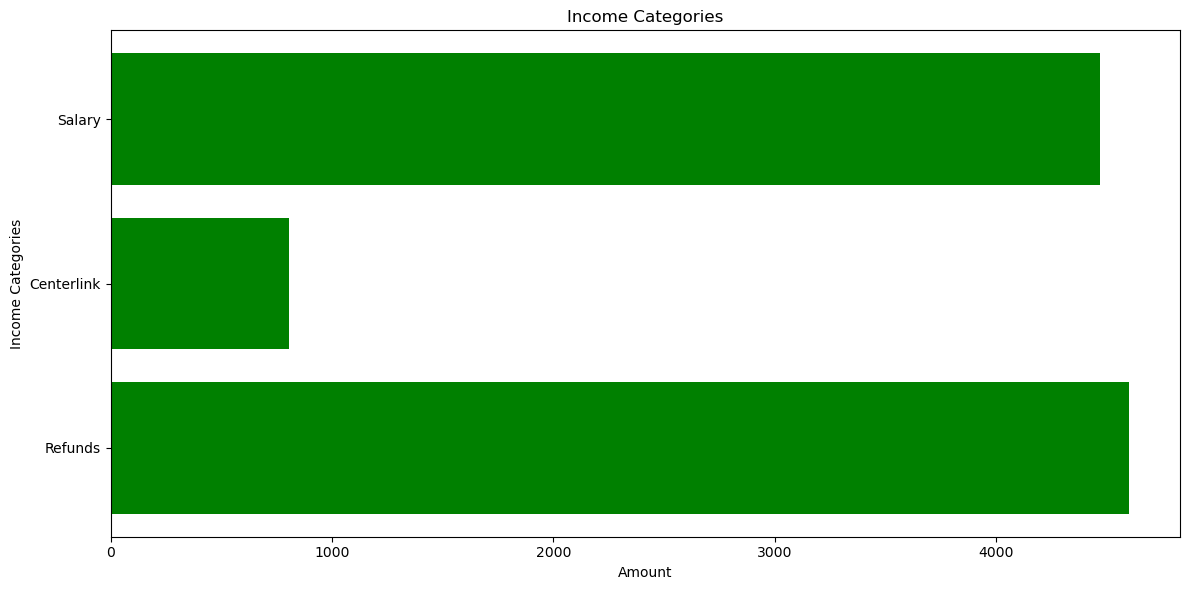

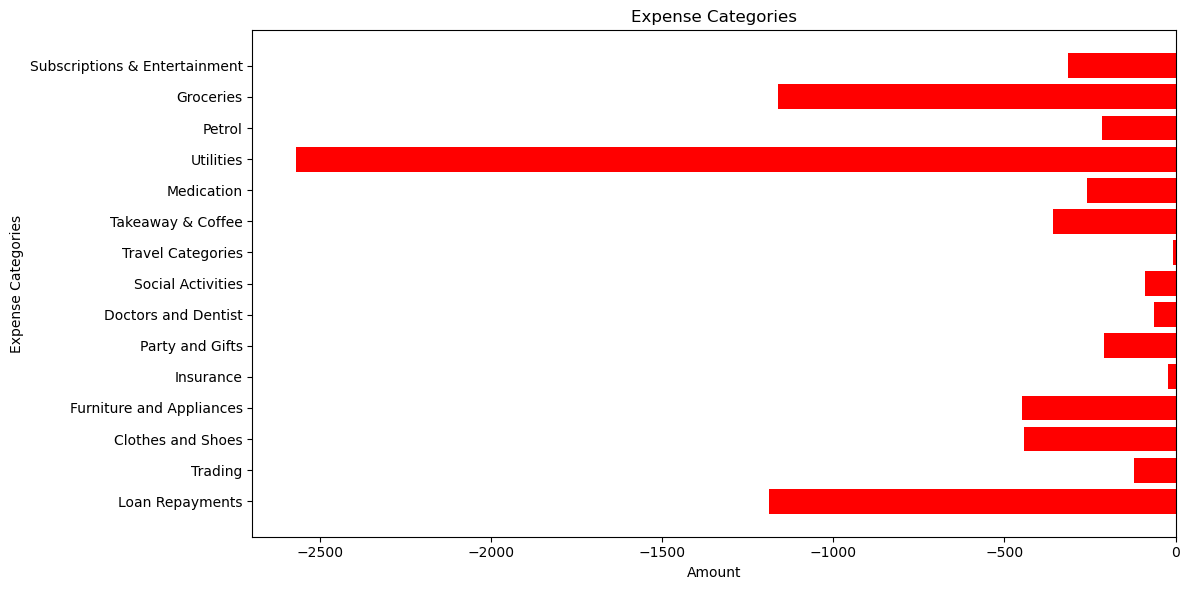

In [13]:
import matplotlib.pyplot as plt

# Initialize empty lists for plotting
income_categories = list(Income.keys())
income_amounts = list(Income.values())
expense_categories = list(Expenses.keys())
expense_amounts = list(Expenses.values())

# Create bar chart for Income
plt.figure(figsize=(12, 6))
plt.barh(income_categories, income_amounts, color='green')
plt.xlabel('Amount')
plt.ylabel('Income Categories')
plt.title('Income Categories')
plt.gca().invert_yaxis()  # Invert y-axis to display highest category at the top
plt.tight_layout()
plt.show()

# Create bar chart for Expenses
plt.figure(figsize=(12, 6))
plt.barh(expense_categories, expense_amounts, color='red', align='edge')
plt.xlabel('Amount')
plt.ylabel('Expense Categories')
plt.title('Expense Categories')
plt.tight_layout()
plt.show()



In [7]:
# Delete the 'Not Required' key if it exists
Income.pop('Not Required', None)

# Print the modified Income dictionary
print(Income)

{'Salary': 4467.6, 'Centerlink': 803.8800000000001, 'Refunds': 4600.4}


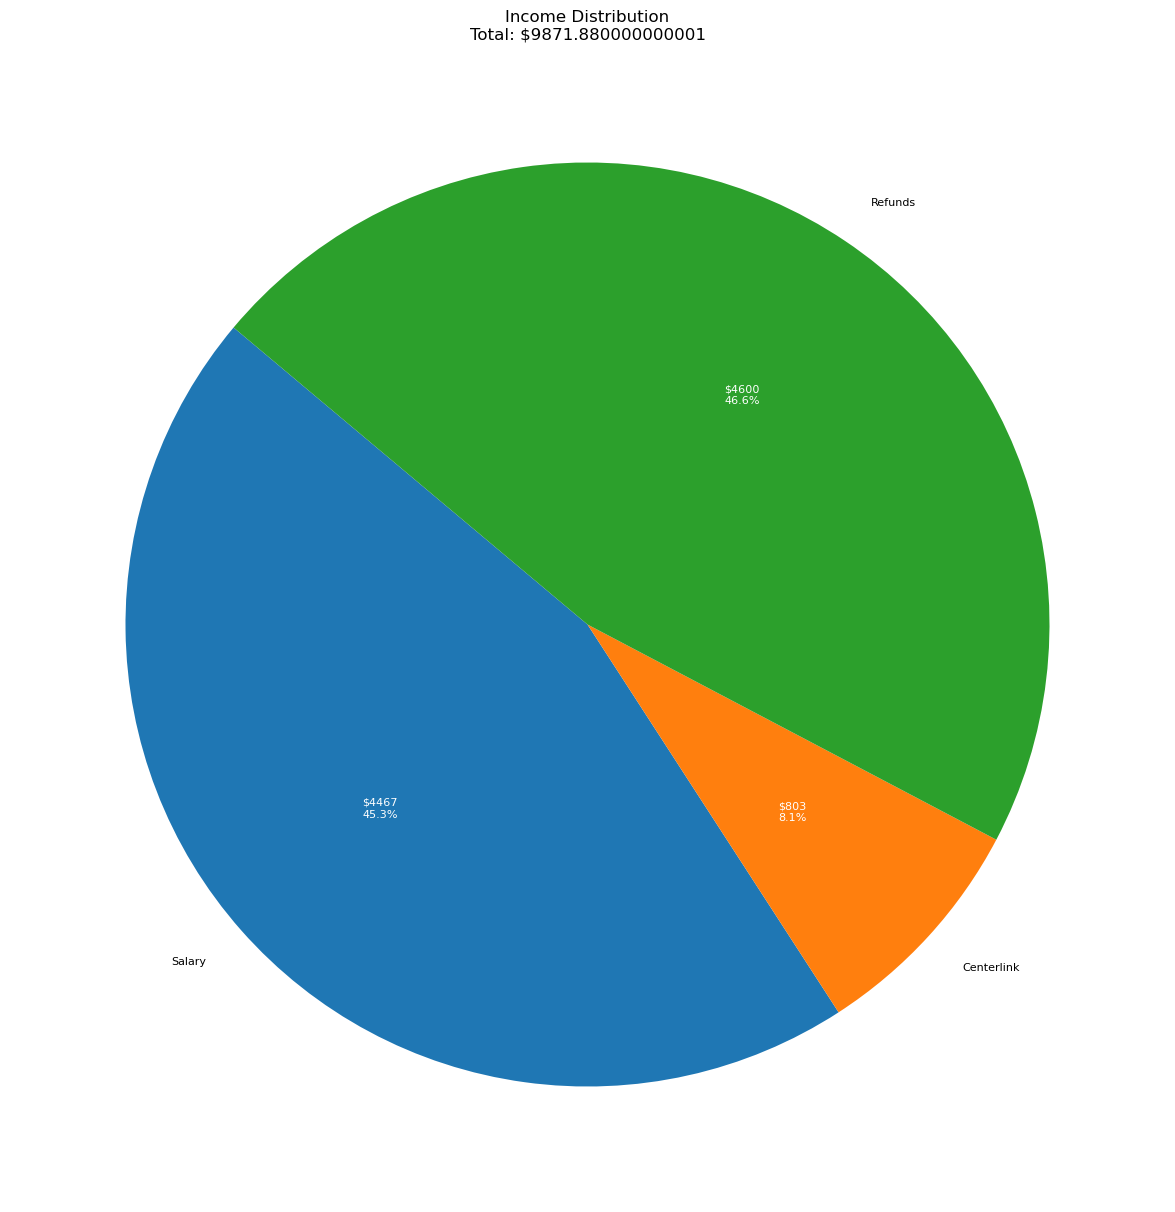

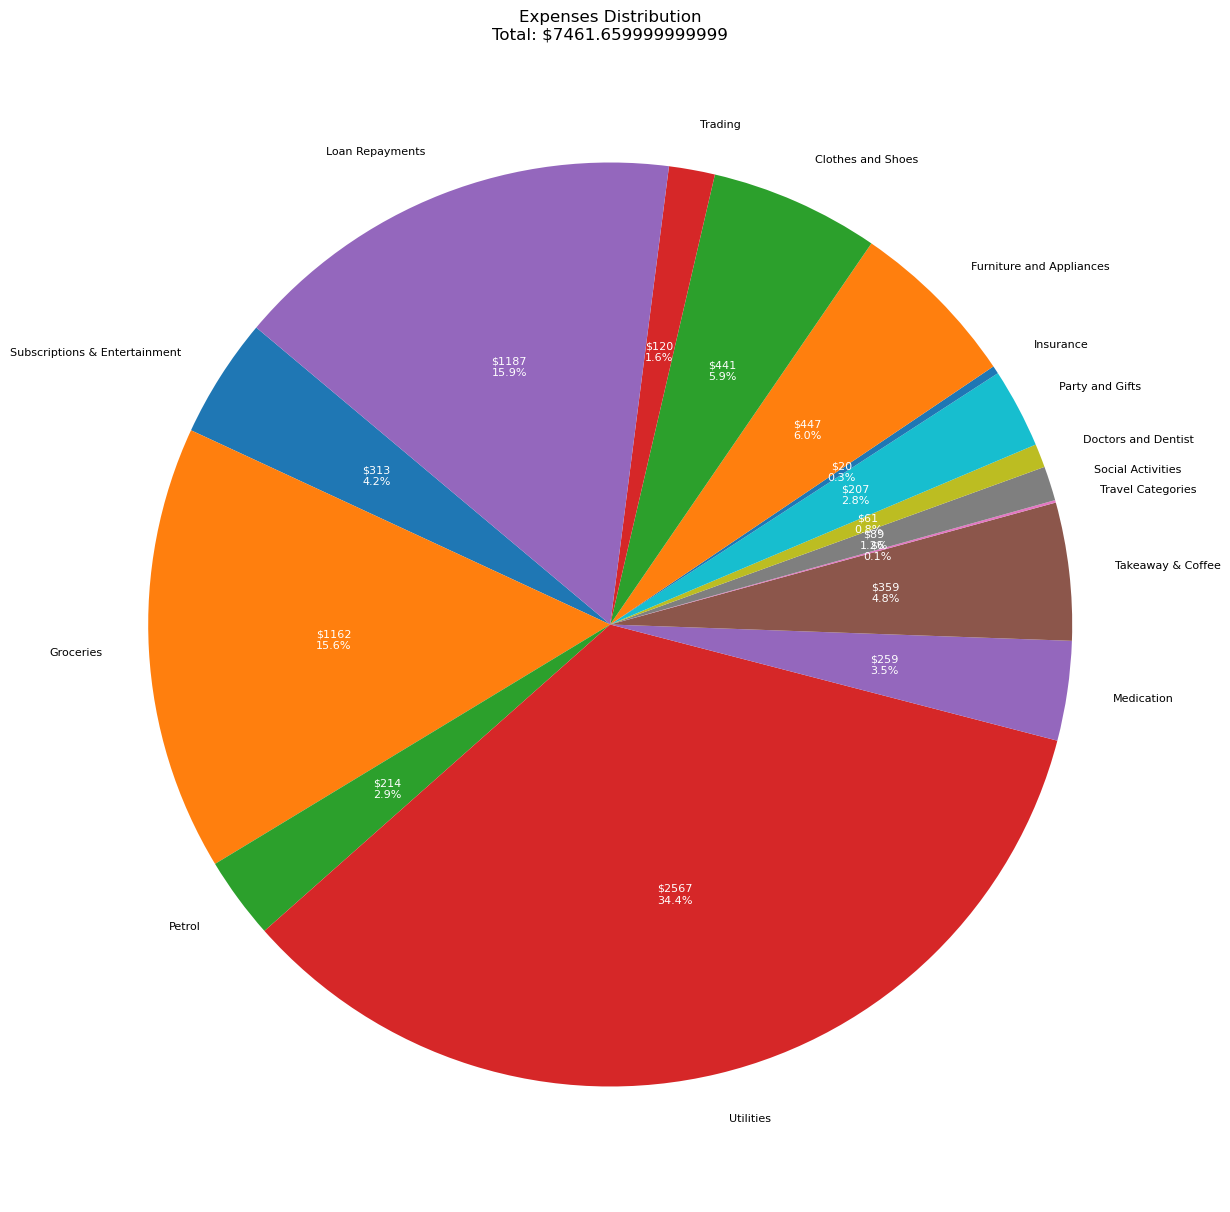

In [8]:
import matplotlib.pyplot as plt

# Function to calculate total and return formatted string
def calculate_total(data):
    total = sum([abs(value) for value in data.values()])
    return f'Total: ${total}'


# Assuming you already have the 'Income' and 'Expenses' dictionaries
# If not, use the code provided earlier to create them

# Plot a pie chart for Income with custom text properties
plt.figure(figsize=(15, 15))
wedges, texts, autotexts = plt.pie([abs(value) for value in Income.values()], labels=Income.keys(), autopct=lambda pct: f"${int(pct/100 * sum([abs(value) for value in Income.values()]))}\n{pct:.1f}%", startangle=140, textprops=dict(size=8))

# Customize the text appearance
for text, autotext in zip(texts, autotexts):
    text.set(size=8)
    autotext.set(size=8, color='white')  # Make autopct text white

plt.title(f'Income Distribution\n{calculate_total(Income)}')
plt.show()

# Plot a pie chart for Expenses with custom text properties
plt.figure(figsize=(15, 15))
wedges, texts, autotexts = plt.pie([abs(value) for value in Expenses.values()], labels=Expenses.keys(), autopct=lambda pct: f"${int(pct/100 * sum([abs(value) for value in Expenses.values()]))}\n{pct:.1f}%", startangle=140, textprops=dict(size=8))

# Customize the text appearance
for text, autotext in zip(texts, autotexts):
    text.set(size=8)
    autotext.set(size=8, color='white')  # Make autopct text white

plt.title(f'Expenses Distribution\n{calculate_total(Expenses)}')
plt.show()


## Next Step: 

 ### Create a monthly budget performance bar that tells how well Im staying on course with my budget.###